# Adding Scale Bars and North Arrows to a GeoPandas/Matplotlib Plot
When making a geospatial plot in matplotlib (as `geopandas.plot()` does), you can use the library [`matplotlib-map-utils`](https://github.com/moss-xyz/matplotlib-map-utils) to add scale bars and north arrows.

Using this package, north arrows and scale bars can be made with either **functions** or **classes**; for the purposes of this tutorial, only the *functions* will be used, though the *classes* work in much the same way. Tutorials for customizing each object are available within the [`docs`](https://github.com/moss-xyz/matplotlib-map-utils/tree/main/matplotlib_map_utils/docs) directory of the repository.

In [1]:
import geopandas as gpd # for manipulating and plotting geographic data
from geodatasets import get_path # for importing geodata
from matplotlib_map_utils.core.north_arrow import north_arrow, NorthArrow # importing the function and class to make a north arrow
from matplotlib_map_utils.core.scale_bar import scale_bar, ScaleBar       # importing the function and class to make a scale bar

### Set-Up

This block of code is only intended to load the data we will use for this tutorial.

In [2]:
nybb = gpd.read_file(get_path("nybb"))

In [3]:
# By default, the data is projected in feet
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

If you are working with a common plot size, both `NorthArrow` and `ScaleBar` have a function called `set_size()` that bulk-updates a variety of settings so that the relevant object looks "better" at that size.

GeoPandas' `plot()` function will create figures of `6.4"x4.8"` with the data used in this tutorial, which corresponds to a size of `small`.

In [4]:
NorthArrow.set_size("small")
ScaleBar.set_size("small")

## North Arrows

The `north_arrow()` function takes in the following arguments:

* `ax`: the axis on which to plot the north arrow

* `location`: a string indicating the location of the north arrow on the plot (see `loc` under [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) e.g., "upper left", "lower right", etc.)

* `scale`: the desired height of the north arrow, in *inches*

* `rotation`: a dictionary containing either a value for `degrees` (if rotation will be set manually), or arguments for `crs`, `reference`, and `coords` (if rotation will be calculated based on the provided CRS)

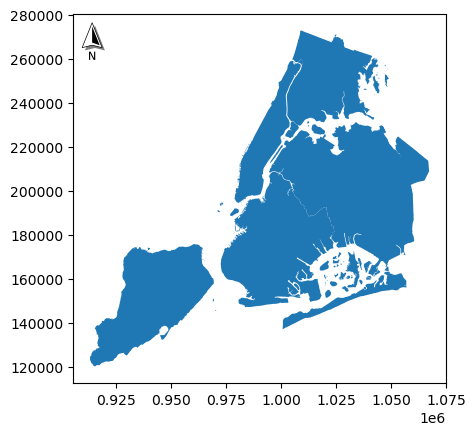

In [5]:
# Making a basic arrow using the minimum amount of arguments
ax = nybb.plot()
north_arrow(ax, location="upper left", rotation={"crs":nybb.crs, "reference":"center"})

Optional additional arguments can be passed to `base`, `fancy`, `shadow`, `label`, `pack`, and `aob` to change the styling of the arrow; see the documentation under `docs\howto_north_arrow.ipynb` in the GitHub repo for details.

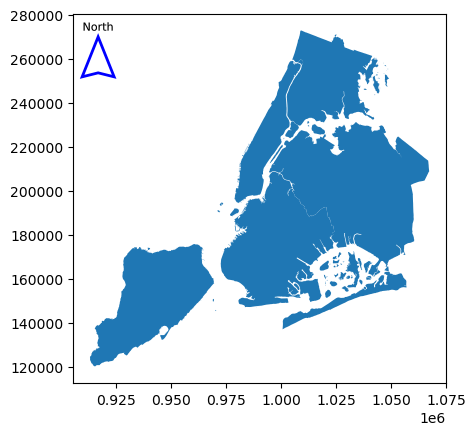

In [6]:
# Making a more customized arrow
ax = nybb.plot()
north_arrow(ax, location="upper left", scale=0.4, rotation={"crs":nybb.crs, "reference":"center"},
            base={"edgecolor":"blue","linewidth":2},
            fancy=False, shadow=False, # this turns off the component
            label={"position":"top", "text":"North", "fontsize":8})

## Scale Bars

The `scale_bar()` function takes in the following arguments:

* `ax`: the axis on which to plot the scale bar

* `location`: a string indicating the location of the scale bar on the plot (see `loc` under [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) e.g., "upper left", "lower right", etc.)

* `style`: the appearance of the arrow: can be either `ticks` or `boxes` (default)

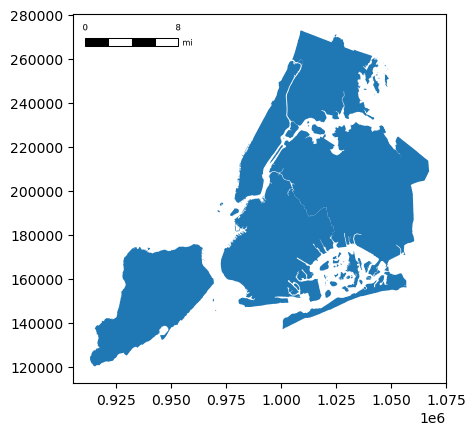

In [7]:
# Making a basic scale bar using the minimum amount of arguments
# Note that the data is auto-converted to miles
ax = nybb.plot()
scale_bar(ax, location="upper left", style="boxes", bar={"projection":nybb.crs})

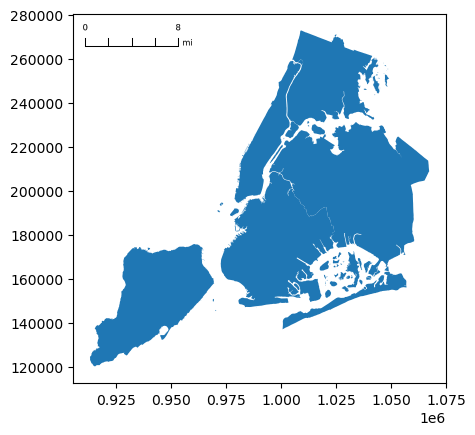

In [8]:
# Making the same scale bar but in the other style (ticks)
ax = nybb.plot()
scale_bar(ax, location="upper left", style="ticks", bar={"projection":nybb.crs})

The scale bar can handle converting between common unit types, as shown in the table below. 

The scale bar can also handle *unprojected* data (degrees) - it will convert it to metres using *great circle distance*, and then convert it into the units selected by the user.

| Unit Type      | Conversion Factor | Accepted Inputs                                        |
|----------------|-------------------|--------------------------------------------------------|
| Meters         | 1                 | `m`,`meter`,`metre`,`meters`,`meters`                  |
| Kilometers     | 1000              | `km`,`kilometer`,`kilometre`,`kilometers`,`kilometers` |
| Feet           | 0.3048            | `ft`,`ftUS`,`foot`,`feet`,`US survey foot`             |
| Yards          | 0.9144            | `yd`,`yard`,`yards`                                    |
| Miles          | 1609.34           | `mi`,`mile`,`miles`                                    |
| Nautical Miles | 1852              | `nmi`,`nautical`,`nautical mile`,`nautical miles`      |

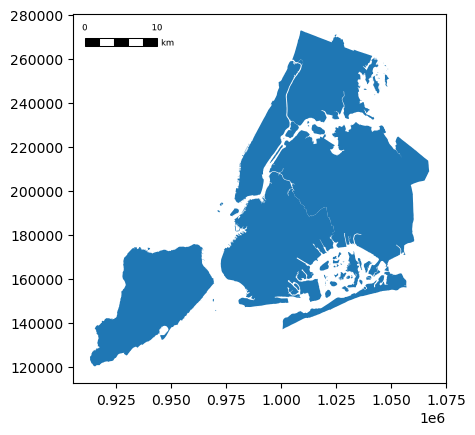

In [9]:
# Making a scale bar in kilometers instead, by changing bar["units"]
# Note that the data did not have to be reprojected to do this
ax = nybb.plot()
scale_bar(ax, location="upper left", style="boxes", bar={"projection":nybb.crs, "unit":"km"})

Optional additional arguments can be passed to `bar`, `labels`, `units`, `text`, and `aob` to change the styling of the bar; see the documentation under `docs\howto_scale_bar.ipynb` in the GitHub repo for details.

*Note that control of the length of the bar, as well as the number of major and minor divisions, are handled within the `bar` style dictionary.*

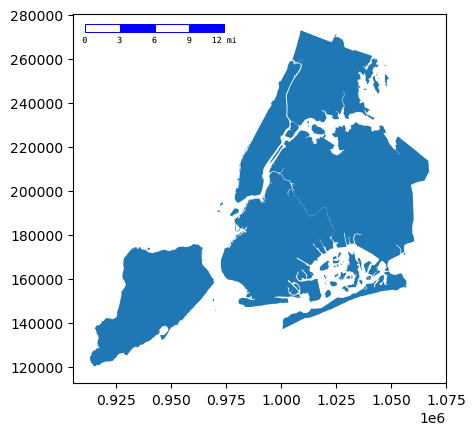

In [10]:
# Making a more formatted scale bar (boxes)
ax = nybb.plot()
scale_bar(ax, location="upper left", style="boxes", 
          bar={"projection":nybb.crs, "max":12, "major_div":4, "minor_div":1,
               "facecolors":["white","blue"], "edgecolors":"blue"},
          labels={"loc":"below", "style":"major"}, 
          units={"loc":"text"}, text={"fontfamily":"monospace"})

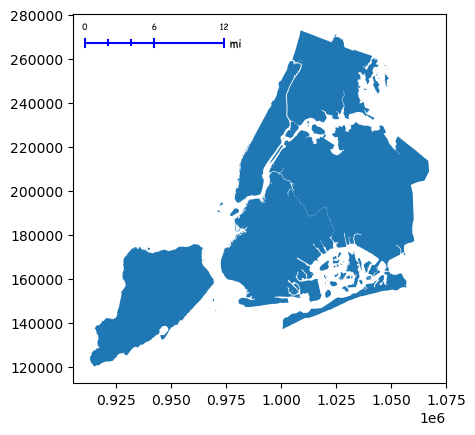

In [11]:
# Making a more formatted scale bar (ticks)
ax = nybb.plot()
scale_bar(ax, location="upper left", style="ticks", 
          bar={"projection":nybb.crs, "max":12, "major_div":2, "minor_div":3, "minor_type":"first",
               "tick_loc":"middle", "tickcolors":"blue", "basecolors":"blue", "tickwidth":1.5},
          labels={"loc":"above", "style":"major"}, 
          units={"loc":"bar", "fontsize":8}, text={"fontfamily":"cursive"})